# Plotting and visualization

In [1]:
from IPython.display import display, Image, HTML
from talktools import website, nbviewer

One of the main usage cases for this display architecture is plotting and visualization. In the last two years, there has been an explosion of plotting and visualization libraries in Python and other languages. That has largely been fueled by visualization moving to the web (d3.js) in IPython and other similar environments.

Giving a detailed and thorough overview of visualization in Python would require an entirely separate talk. The purpose here is to show a few of the visualization tools and their integration with the IPython Notebook.

## matplotlib

The foundation for plotting and visualization in Python is [matplotlib](). While there are newer visualizations libraries, almost all of them use matplotlib as a base layer.

IPython has a long history of tight integration with matplotlib. Inline plotting in the Notebook is enabled using `%matplotlib inline`:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

Here is a simple plot from the [matplotlib gallery](http://matplotlib.org/gallery.html):

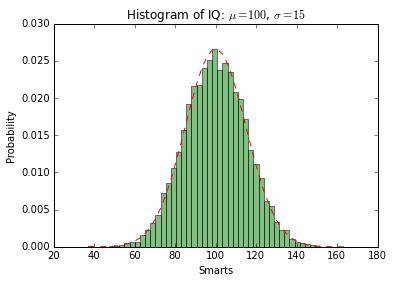

In [3]:
# example data
mu = 100 # mean of distribution
sigma = 15 # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)

## mpld3

The [d3.js](http://d3js.org/) JavaScript library offers a powerful approach for interactive visualization in modern web browsers. The [mpld3](http://mpld3.github.io/) Python package adds d3 based rendering to matplotlib. This provides interactivity (pan, zoom, hover, etc.) while maintaining the same matplotlib APIs. These interactive visualizations also display on http://nbviewer.ipython.org.

In [4]:
import mpld3
mpld3.enable_notebook()

Here is an example of a 2d scatter plot with tooltips for each data point:

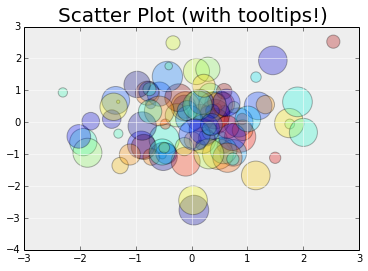

In [5]:
fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
N = 100

scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s=1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)
ax.grid(color='white', linestyle='solid')

ax.set_title("Scatter Plot (with tooltips!)", size=20)

labels = ['point {0}'.format(i + 1) for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

## Plotly

[Plotly](https://plot.ly/)

> Analyze and Visualize Data, Together.

Plotly is a web-based data analysis and plotting tool that has IPython integration and uses d3.js for its visualizations. It goes beyond plotting and enables the sharing of plots and analyses across a wide range of programming languages (Python, Matlab, R, Julia).

In [2]:
import plotly
py = plotly.plotly('IPython.Demo', '1fw3zw2o13')
nr = np.random

TypeError: 'module' object is not callable

In [ ]:
distributions = [nr.uniform, nr.normal , lambda size: nr.normal(0, 0.2, size=size),
                 lambda size: nr.beta(a=0.5, b=0.5, size=size),
                 lambda size: nr.beta(a=0.5, b=2, size=size)]

names = ['Uniform(0,1)', 'Normal(0,1)', 'Normal(0, 0.2)', 'beta(a=0.5, b=0.5)', 'beta(a=0.5, b=2)']

boxes = [{'y': dist(size=50), 'type': 'box', 'boxpoints': 'all', 'jitter': 0.5, 'pointpos': -1.8,
        'name': name} for dist, name in zip(distributions, names)]

layout = {'title': 'A few distributions',
          'showlegend': False,
          'xaxis': {'ticks': '', 'showgrid': False, 'showline': False},
          'yaxis': {'zeroline': False, 'ticks': '', 'showline': False},
          }

py.iplot(boxes, layout = layout, filename='Distributions', fileopt='overwrite')

## Other visualization libraries

* [Bokeh:](http://bokeh.pydata.org/) interactive visualization library for large datasets
* [Seaborn:](http://www.stanford.edu/~mwaskom/software/seaborn/) Statistical data visualization